In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/si/Downloads/ps-data-test-txn-data-202009.csv')
df.head(5)

,customer_guid,transaction_guid,authorisation_datetime,transaction_type,transaction_amount_gbp,entry_mode_type,card_type,mcc_group
0,6813485667fca49d97bb79db4c5fcf91,d05aa606df57c0ba66b66cce5aabcce7,2019-08-25 17:53:07,Sale,17.00,Ecom,CREDIT,F&B Off-Premise
1,bd60d09549e4129ef6fbdddd43651dd2,cc0ff2e88a3b175adee250a48acf1bf1,2019-08-25 18:30:21,Sale,15.00,Ecom,CREDIT,F&B Hospitality
2,09b9e24045316cae00a98ca80da7041b,815507cde3b72ab3a497fb2cad247373,2019-08-25 18:16:03,Sale,4.50,Chip&Pin,DEBIT,F&B Off-Premise
3,09b9e24045316cae00a98ca80da7041b,b1911c4b6e2440204fc131f8d16e6c7f,2019-08-25 17:15:04,Sale,2.35,Chip&Pin,DEBIT,F&B Off-Premise
4,09b9e24045316cae00a98ca80da7041b,c32478f613f44750be3fe848b1a978d7,2019-08-25 15:25:20,Sale,10.10,Chip&Pin,DEBIT,F&B Off-Premise


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686934 entries, 0 to 5686933
Data columns (total 8 columns):
customer_guid             object
transaction_guid          object
authorisation_datetime    object
transaction_type          object
transaction_amount_gbp    float64
entry_mode_type           object
card_type                 object
mcc_group                 object
dtypes: float64(1), object(7)
memory usage: 347.1+ MB


In [4]:
# number of customers in the dataset
df['customer_guid'].nunique()

1935

In [5]:
# how many customers in each industry
df.drop_duplicates(subset=['customer_guid', 'mcc_group']).groupby('mcc_group').count()['customer_guid'].reset_index().sort_values(by='customer_guid', ascending=False)

,mcc_group,customer_guid
5,F&B Hospitality,803
6,F&B Off-Premise,341
2,Automotive,155
11,Personal Services,116
10,Other,93
14,Specialty Retail,77
1,Apparel/Clothing,74
13,Retail,60
8,Health Care,53
0,Accommodation & Travel,48


In [6]:
# total value of transactions by industry
value = df.groupby('mcc_group').sum().reset_index()
value.sort_values('transaction_amount_gbp', ascending=False)

,mcc_group,transaction_amount_gbp
5,F&B Hospitality,6.684360e+07
6,F&B Off-Premise,1.399678e+07
2,Automotive,9.570899e+06
10,Other,6.246463e+06
11,Personal Services,4.615204e+06
1,Apparel/Clothing,3.879946e+06
14,Specialty Retail,3.411315e+06
8,Health Care,3.334236e+06
0,Accommodation & Travel,3.210088e+06
13,Retail,2.858726e+06


In [7]:
# number of transactions by industry
frequency = df.groupby('mcc_group').count()['transaction_amount_gbp'].reset_index()
frequency.sort_values('transaction_amount_gbp', ascending=False)

,mcc_group,transaction_amount_gbp
5,F&B Hospitality,3655969
6,F&B Off-Premise,1213213
10,Other,183445
14,Specialty Retail,94954
13,Retail,93705
11,Personal Services,91945
8,Health Care,71568
2,Automotive,61459
1,Apparel/Clothing,56170
4,Entertainment / Recreational,55956


In [8]:
# merge value and frequency tables and calculate monthly average 
val_fre = value.merge(frequency, left_on = 'mcc_group', right_on= 'mcc_group').rename(
    columns={'transaction_amount_gbp_x':'value', 'transaction_amount_gbp_y':'frequency'}).sort_values('value', ascending=False)
val_fre['value'] = val_fre['value'] / 9
val_fre['frequency'] = val_fre['frequency'] / 9
val_fre

,mcc_group,value,frequency
5,F&B Hospitality,7.427066e+06,406218.777778
6,F&B Off-Premise,1.555197e+06,134801.444444
2,Automotive,1.063433e+06,6828.777778
10,Other,6.940514e+05,20382.777778
11,Personal Services,5.128004e+05,10216.111111
1,Apparel/Clothing,4.311051e+05,6241.111111
14,Specialty Retail,3.790350e+05,10550.444444
8,Health Care,3.704707e+05,7952.000000
0,Accommodation & Travel,3.566764e+05,5346.555556
13,Retail,3.176362e+05,10411.666667


<IPython.core.display.Javascript object>


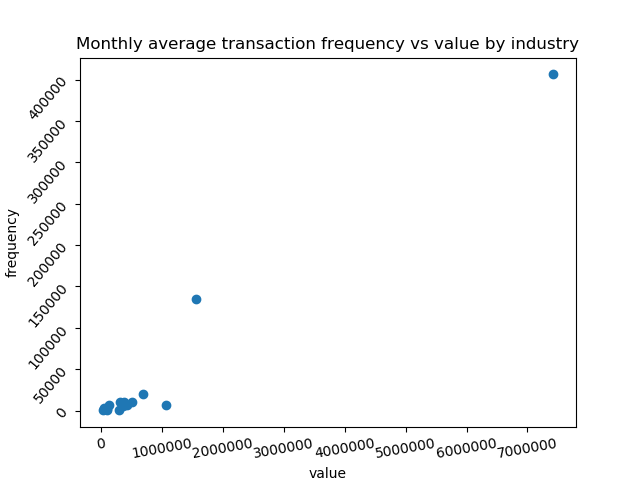

In [9]:
# visualise value vs. frequency via scatter plot
plt.figure()
scatter = plt.scatter(val_fre['value'], val_fre['frequency'])
industry = val_fre['mcc_group'].values
plt.xlabel('value', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.title('Monthly average transaction frequency vs value by industry', fontsize=12)
plt.xticks(rotation = '10')
plt.yticks(rotation = '50')
plt.show()

<IPython.core.display.Javascript object>


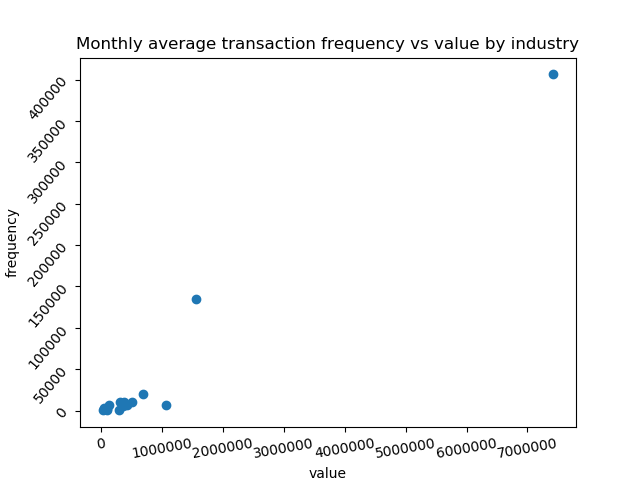

In [10]:
# take a closer look at the cluster in the bottom left
plt.figure()
plt.scatter(val_fre['value'], val_fre['frequency'])
plt.xlabel('value', fontsize=10)
plt.ylabel('frequency', fontsize=10)
plt.title('Monthly average transaction frequency vs value by industry', fontsize=12)
plt.xticks(rotation = '10')
plt.yticks(rotation = '50')
plt.show()

In [11]:
# aggregate total daily transaction by customer and calculate 7-day moving average of value for each customer
df.authorisation_datetime = pd.to_datetime(df.authorisation_datetime)
moving_ave_value = df.groupby(['customer_guid', df['authorisation_datetime'].dt.date]).sum().reset_index()
moving_ave_value.head()

,customer_guid,authorisation_datetime,transaction_amount_gbp
0,0020402f84aa3cbdf289156a6247ab52,2019-08-13,0.01
1,0020402f84aa3cbdf289156a6247ab52,2019-08-22,76.02
2,0020402f84aa3cbdf289156a6247ab52,2019-08-23,181.00
3,0020402f84aa3cbdf289156a6247ab52,2019-08-24,223.00
4,0020402f84aa3cbdf289156a6247ab52,2019-08-27,55.00


In [12]:
moving_ave_v = moving_ave_value.groupby('customer_guid',sort=False).rolling(window=7).transaction_amount_gbp.mean().reset_index()
moving_ave_value['move_ave_val'] = moving_ave_v.set_index('level_1')['transaction_amount_gbp']
moving_ave_value.head(10)

,customer_guid,authorisation_datetime,transaction_amount_gbp,move_ave_val
0,0020402f84aa3cbdf289156a6247ab52,2019-08-13,0.01,NaN
1,0020402f84aa3cbdf289156a6247ab52,2019-08-22,76.02,NaN
2,0020402f84aa3cbdf289156a6247ab52,2019-08-23,181.00,NaN
3,0020402f84aa3cbdf289156a6247ab52,2019-08-24,223.00,NaN
4,0020402f84aa3cbdf289156a6247ab52,2019-08-27,55.00,NaN
5,0020402f84aa3cbdf289156a6247ab52,2019-08-28,113.00,NaN
6,0020402f84aa3cbdf289156a6247ab52,2019-08-29,73.00,103.004286
7,0020402f84aa3cbdf289156a6247ab52,2019-08-30,76.00,113.860000
8,0020402f84aa3cbdf289156a6247ab52,2019-08-31,70.00,113.000000
9,0020402f84aa3cbdf289156a6247ab52,2019-09-03,108.00,102.571429


In [12]:
# calculate 7-day moving average of frequency for each customer
moving_ave_frequency = df.groupby(['customer_guid', df['authorisation_datetime'].dt.date]).mean().reset_index()
moving_ave_f = moving_ave_frequency.groupby('customer_guid',sort=False).rolling(window=7).transaction_amount_gbp.mean().reset_index()
moving_ave_frequency['move_ave_fre'] = moving_ave_f.set_index('level_1')['transaction_amount_gbp']
moving_ave_frequency.head(10)

,customer_guid,authorisation_datetime,transaction_amount_gbp,move_ave_fre
0,0020402f84aa3cbdf289156a6247ab52,2019-08-13,0.010000,NaN
1,0020402f84aa3cbdf289156a6247ab52,2019-08-22,15.204000,NaN
2,0020402f84aa3cbdf289156a6247ab52,2019-08-23,22.625000,NaN
3,0020402f84aa3cbdf289156a6247ab52,2019-08-24,24.777778,NaN
4,0020402f84aa3cbdf289156a6247ab52,2019-08-27,27.500000,NaN
5,0020402f84aa3cbdf289156a6247ab52,2019-08-28,22.600000,NaN
6,0020402f84aa3cbdf289156a6247ab52,2019-08-29,24.333333,19.578587
7,0020402f84aa3cbdf289156a6247ab52,2019-08-30,19.000000,22.291444
8,0020402f84aa3cbdf289156a6247ab52,2019-08-31,23.333333,23.452778
9,0020402f84aa3cbdf289156a6247ab52,2019-09-03,27.000000,24.077778


In [13]:
# merge moving_ave_value and moving_ave_frequency
moving_ave_frequency_merge = moving_ave_frequency[['customer_guid', 'move_ave_fre']]
moving_ave_temp = pd.merge(moving_ave_value, moving_ave_frequency_merge, on='customer_guid', right_index=True, left_index=True)
moving_ave_temp.head(10)

,customer_guid,authorisation_datetime,transaction_amount_gbp,move_ave_val,move_ave_fre
0,0020402f84aa3cbdf289156a6247ab52,2019-08-13,0.01,NaN,NaN
1,0020402f84aa3cbdf289156a6247ab52,2019-08-22,76.02,NaN,NaN
2,0020402f84aa3cbdf289156a6247ab52,2019-08-23,181.00,NaN,NaN
3,0020402f84aa3cbdf289156a6247ab52,2019-08-24,223.00,NaN,NaN
4,0020402f84aa3cbdf289156a6247ab52,2019-08-27,55.00,NaN,NaN
5,0020402f84aa3cbdf289156a6247ab52,2019-08-28,113.00,NaN,NaN
6,0020402f84aa3cbdf289156a6247ab52,2019-08-29,73.00,103.004286,19.578587
7,0020402f84aa3cbdf289156a6247ab52,2019-08-30,76.00,113.860000,22.291444
8,0020402f84aa3cbdf289156a6247ab52,2019-08-31,70.00,113.000000,23.452778
9,0020402f84aa3cbdf289156a6247ab52,2019-09-03,108.00,102.571429,24.077778


In [14]:
# drop NA rows (first 6 rows) for each customer
moving_ave = moving_ave_temp.dropna()
moving_ave.head(10)

,customer_guid,authorisation_datetime,transaction_amount_gbp,move_ave_val,move_ave_fre
6,0020402f84aa3cbdf289156a6247ab52,2019-08-29,73.0,103.004286,19.578587
7,0020402f84aa3cbdf289156a6247ab52,2019-08-30,76.0,113.860000,22.291444
8,0020402f84aa3cbdf289156a6247ab52,2019-08-31,70.0,113.000000,23.452778
9,0020402f84aa3cbdf289156a6247ab52,2019-09-03,108.0,102.571429,24.077778
10,0020402f84aa3cbdf289156a6247ab52,2019-09-04,88.0,83.285714,23.680952
11,0020402f84aa3cbdf289156a6247ab52,2019-09-05,58.0,83.714286,22.514286
12,0020402f84aa3cbdf289156a6247ab52,2019-09-06,165.0,91.142857,22.653061
13,0020402f84aa3cbdf289156a6247ab52,2019-09-07,113.5,96.928571,21.879252
14,0020402f84aa3cbdf289156a6247ab52,2019-09-10,52.0,93.500000,21.641156
15,0020402f84aa3cbdf289156a6247ab52,2019-09-11,83.0,95.357143,22.260204


In [15]:
# add two additional rows to see wheather the value is increasing or decreasing
moving_ave['val_change'] = np.where(moving_ave.move_ave_val.diff() > 0, 'increase', 'decline')
moving_ave['fre_change'] = np.where(moving_ave.move_ave_fre.diff() > 0, 'increase', 'decline')

/Users/si/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/si/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# remove customers who only have one transaction record
remove = moving_ave['customer_guid'].value_counts()
remove = remove[remove==1]
remove.keys().to_list()
moving_ave = moving_ave[~moving_ave['customer_guid'].isin(remove.keys().to_list())]
moving_ave.head()

,customer_guid,authorisation_datetime,transaction_amount_gbp,move_ave_val,move_ave_fre,val_change,fre_change
6,0020402f84aa3cbdf289156a6247ab52,2019-08-29,73.0,103.004286,19.578587,decline,decline
7,0020402f84aa3cbdf289156a6247ab52,2019-08-30,76.0,113.860000,22.291444,increase,increase
8,0020402f84aa3cbdf289156a6247ab52,2019-08-31,70.0,113.000000,23.452778,decline,increase
9,0020402f84aa3cbdf289156a6247ab52,2019-09-03,108.0,102.571429,24.077778,decline,increase
10,0020402f84aa3cbdf289156a6247ab52,2019-09-04,88.0,83.285714,23.680952,decline,decline


In [17]:
# 1. look at the last 7 days (most recent) moving average for each customer
# 2. turn increase and decrease into numeric value 0 and 1 and add two columns up to have a total value
risk = moving_ave.groupby('customer_guid').tail(7)
risk['val_change'].replace(['decline', 'increase'], [1,0], inplace = True)
risk['fre_change'].replace(['decline', 'increase'], [1,0], inplace = True)
risk['combined_change'] = risk['val_change'] + risk['fre_change']
risk.head()

/Users/si/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/si/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,customer_guid,authorisation_datetime,transaction_amount_gbp,move_ave_val,move_ave_fre,val_change,fre_change,combined_change
63,0020402f84aa3cbdf289156a6247ab52,2019-11-21,76.0,62.858571,19.591190,1,1,2
64,0020402f84aa3cbdf289156a6247ab52,2019-11-22,113.0,76.571429,22.411905,0,0,0
65,0020402f84aa3cbdf289156a6247ab52,2019-11-23,70.0,75.000000,22.852381,1,0,1
66,0020402f84aa3cbdf289156a6247ab52,2019-11-26,50.0,68.714286,22.547619,1,1,2
67,0020402f84aa3cbdf289156a6247ab52,2019-11-27,58.0,74.142857,23.833333,0,0,0


In [18]:
# look at how many "decline days" for each customer
val_fre_combined = risk.groupby('customer_guid').sum()['combined_change'].reset_index()
val_fre_combined.head()

,customer_guid,combined_change
0,0020402f84aa3cbdf289156a6247ab52,6
1,002ce956918a8d8df556b7b408a88599,8
2,00ca74bb4ea39a80c2bed3936953079e,7
3,00f2c78b063f3b62e1925c562fc7b0ed,6
4,010b6775c9ca9e31dae5a55b374e4aef,8


In [19]:
# filter out customers who have more than 12 declines to see risky customer
# note that the maximum declines is 14
risk_list = val_fre_combined[val_fre_combined['combined_change']>=12]

In [20]:
# calculate customer value for each customer
customer_value = df.groupby('customer_guid').sum()['transaction_amount_gbp'].reset_index()
customer_value.head()

,customer_guid,transaction_amount_gbp
0,0020402f84aa3cbdf289156a6247ab52,6168.04
1,002ce956918a8d8df556b7b408a88599,4767.51
2,00be7a4adfdd6c3eba16b94de6e8efd1,0.01
3,00ca74bb4ea39a80c2bed3936953079e,12267.43
4,00f2c78b063f3b62e1925c562fc7b0ed,34694.78


In [21]:
# vlookup customer value for each risky customer
risk_list_value = pd.merge(risk_list, customer_value, how='inner', left_on='customer_guid', right_on='customer_guid').sort_values(by='transaction_amount_gbp', ascending=False)
risk_list_value.head()

,customer_guid,combined_change,transaction_amount_gbp
2,25f8d7777ab872e3410c1099f730a549,12,632023.68
24,a2a716c6f35b31017bb6d6c1b66ab0cb,12,426663.00
29,cf1f3b24471eea7f58461e687a8df9e5,12,177391.02
16,6c36d6fef9db943596ca64b7db57732e,12,164365.93
22,988cdca7fa59b4512df5b27990c85b35,12,130406.03


In [22]:
# vlookup industry to risky customer list
df1 = df[['customer_guid', 'mcc_group']].drop_duplicates()
risk_list_industry = risk_list_value.merge(df1, how='inner', left_on='customer_guid', right_on='customer_guid').sort_values(by='transaction_amount_gbp', ascending=False)
risk_list_industry

,customer_guid,combined_change,transaction_amount_gbp,mcc_group
0,25f8d7777ab872e3410c1099f730a549,12,632023.68,Accommodation & Travel
1,a2a716c6f35b31017bb6d6c1b66ab0cb,12,426663.00,F&B Hospitality
2,cf1f3b24471eea7f58461e687a8df9e5,12,177391.02,Accommodation & Travel
3,6c36d6fef9db943596ca64b7db57732e,12,164365.93,Automotive
4,988cdca7fa59b4512df5b27990c85b35,12,130406.03,Personal Services
5,d4006d7a761686cedf026143fc538a6b,12,102180.17,F&B Hospitality
6,63caaf030bf4a41f98f83adc724c08f8,14,100032.70,Automotive
7,231972c7ba9aa5ff27bdaa9b52f61cda,12,91576.34,Specialty Retail
8,8f3b18669a33bce11cb37e84c76d1062,13,83186.00,F&B Hospitality
9,44d530ddc7afee6268979f5d06cfcb82,12,72422.44,Other
